In [68]:
import os

files = [os.path.join("data/icons/outline/train", f) for f in os.listdir("data/icons/outline/train")]

In [69]:
import tokenizers

In [70]:
model = tokenizers.models.BPE()
trainer = tokenizers.trainers.BpeTrainer(vocab_size=1, special_tokens=["[PAD]", "[SOS]", "[EOS]", "[MASK]", "[UNK]"])

In [78]:
tokenizer = tokenizers.Tokenizer(model=model)
tokenizer.pre_tokenizer = tokenizers.pre_tokenizers.Sequence(
    [tokenizers.pre_tokenizers.Digits(True)]
)

tokenizer.add_tokens(
    [
        tokenizers.AddedToken(
            """<svg
  xmlns="http://www.w3.org/2000/svg"
  width="24"
  height="24"
  viewBox="0 0 24 24"
  fill="none"
  stroke="currentColor"
  stroke-width="2"
  stroke-linecap="round"
  stroke-linejoin="round"
>"""
        ),
        tokenizers.AddedToken('<path d="M'),
        tokenizers.AddedToken('category: '),
        tokenizers.AddedToken('tags: '),
        tokenizers.AddedToken('version: '),
        tokenizers.AddedToken('unicode: '),
        tokenizers.AddedToken('<!--'),
        tokenizers.AddedToken('-->'),
        tokenizers.AddedToken('" />'),
        tokenizers.AddedToken('</svg>'),
    ]
)

tokenizer.train(files, trainer=trainer)
print(tokenizer.get_vocab_size())




87


In [88]:
viz = EncodingVisualizer(tokenizer)
viz(icons[1:1024])

In [80]:
with open("data/icons/icons.txt", "r") as f:
    icons = f.read()
encoded = tokenizer.encode(icons)

In [81]:
print(len(icons))
print(encoded)

1916424
Encoding(num_tokens=874030, attributes=[ids, type_ids, tokens, offsets, attention_mask, special_tokens_mask, overflowing])


In [82]:
from tokenizers.tools import EncodingVisualizer

In [83]:
encoded = encoded.ids
# most frequent ids
frequency = {
    tokenizer.decode([i]): encoded.count(i)
    for i in sorted(set(encoded), key=lambda x: encoded.count(x), reverse=False)
}

print(frequency)
print(len(frequency))

{'#': 1, '/': 1, 'ñ': 1, '!': 2, '>': 2, '@': 2, '+': 3, '?': 3, ':': 6, 'Z': 11, 'P': 32, 'G': 35, '<': 46, 'W': 48, 'H': 55, 'F': 57, 'E': 74, 'V': 74, 'T': 122, 'N': 125, 'j': 163, 'q': 172, 'L': 177, '=': 204, 'A': 255, 'C': 260, 'B': 342, 'M': 365, 'S': 481, 'x': 491, 'D': 640, 'k': 697, 'w': 1348, 'z': 1824, 'y': 2022, 'b': 2430, 'tags: ': 2680, '[': 2682, ']': 2682, 'g': 2752, 'u': 2758, 'category: ': 3073, 'p': 3401, '<svg\n  xmlns="http://www.w3.org/2000/svg"\n  width="24"\n  height="24"\n  viewBox="0 0 24 24"\n  fill="none"\n  stroke="currentColor"\n  stroke-width="2"\n  stroke-linecap="round"\n  stroke-linejoin="round"\n>': 3677, 'version: ': 3677, 'unicode: ': 3677, '<!--': 3677, '-->': 3677, '</svg>': 3677, 'd': 4286, 'f': 4440, 'm': 6134, 's': 6930, 'n': 7114, 'i': 7742, 'o': 7849, 'r': 7879, 'v': 8874, 't': 8898, 'c': 9496, 'h': 10876, ',': 11013, 'l': 13868, '<path d="M': 14490, '" />': 14534, 'e': 14648, '"': 15120, '7': 17302, '9': 17742, '8': 18351, '6': 19165, 'a': 

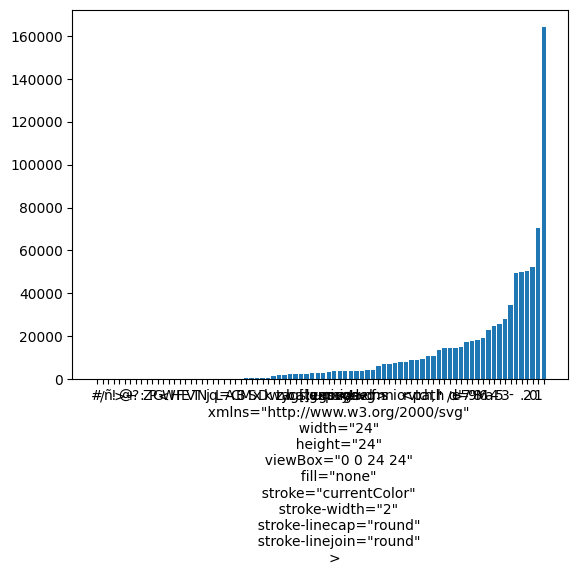

In [85]:
#plot distribution
import matplotlib.pyplot as plt
plt.bar(frequency.keys(), frequency.values())
plt.show()

In [77]:
tokenizer.save("data/icons/vocab/tokenizer.json")